In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("../data/datasetFinal/cobros_final.csv")

/var/folders/tl/n2n7gv595bq_stcnjf2_yz440000gn/T/ipykernel_67541/1744740821.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/datasetFinal/cobros_final.csv")


In [7]:
df.columns

Index(['idListaCobro', 'idCredito', 'consecutivoCobro', 'idBanco',
       'montoExigible', 'montoCobrar', 'montoCobrado', 'fechaCobroBanco',
       'idRespuestaBanco', 'fechaCreacionLista', 'fechaEnvioCobro',
       'idEmisora'],
      dtype='object')

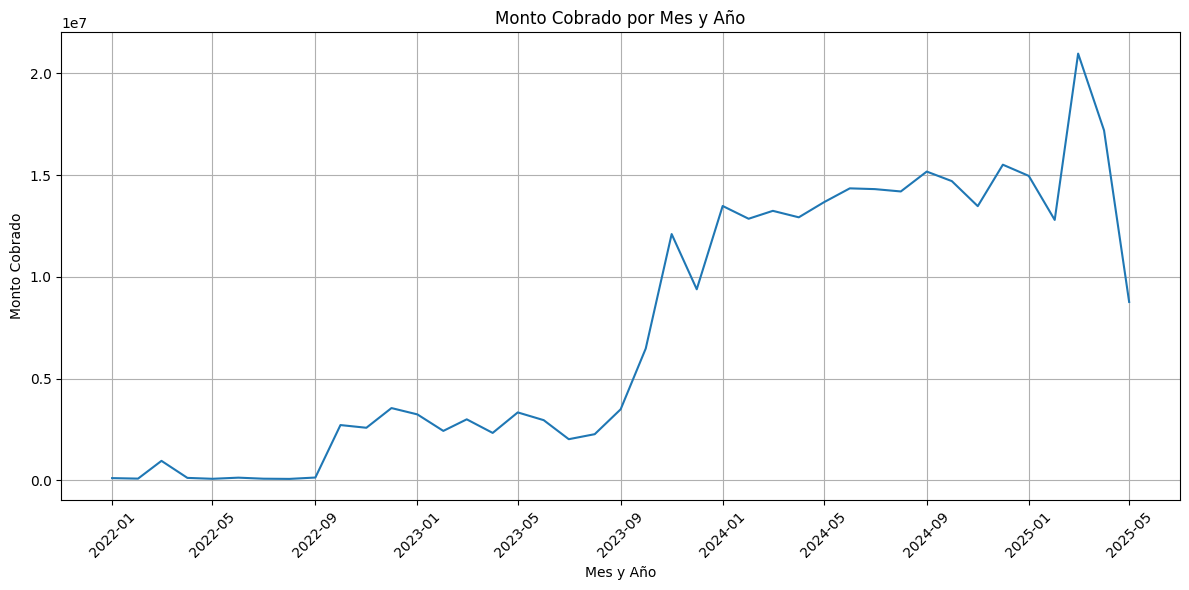

In [ ]:
# Grafica agregada monto cobrado por mes y año
df['fechaCobroBanco'] = pd.to_datetime(df['fechaCobroBanco'])
df['year'] = df['fechaCobroBanco'].dt.year
df['month'] = df['fechaCobroBanco'].dt.month
df['month_year'] = df['fechaCobroBanco'].dt.to_period('M')
df['montoCobrado'] = df['montoCobrado'].astype(float)


# Agrupamos por mes y año
df_grouped = df.groupby(['year', 'month'])['montoCobrado'].sum().reset_index()
df_grouped['month_year'] = pd.to_datetime(df_grouped[['year', 'month']].assign(day=1))
df_grouped['montoCobrado'] = df_grouped['montoCobrado'].astype(float)
# Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='month_year', y='montoCobrado')
plt.title('Monto Cobrado por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Monto Cobrado')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
df['pay'] = np.where(df['montoCobrado'] > 0, 1, 0)

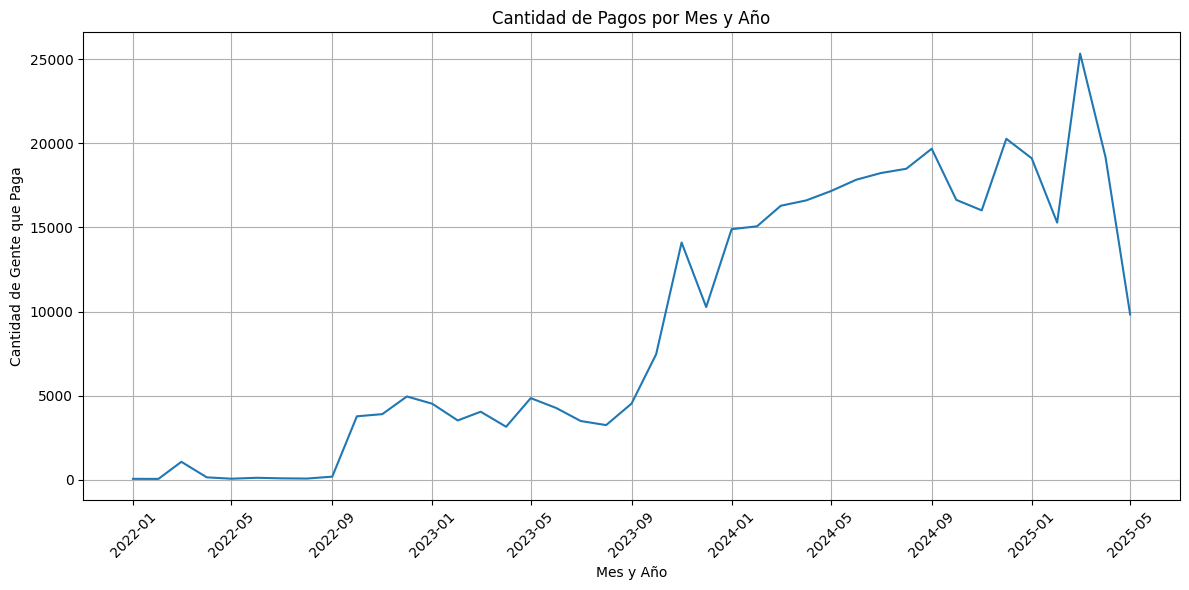

In [13]:
# Grafica de cantidad de gente que paga por mes y año
df_grouped_pay = df.groupby(['year', 'month'])['pay'].sum().reset_index()
df_grouped_pay['month_year'] = pd.to_datetime(df_grouped_pay[['year', 'month']].assign(day=1))
# Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_pay, x='month_year', y='pay')
plt.title('Cantidad de Pagos por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Gente que Paga')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [14]:
pagare= pd.read_csv("../data/datasetFinal/Capital_Pagare_FechaAperturaCredito.csv")

In [15]:
pagare

,idcredito,pagare,capital,fechaAperturaCredito
0,10456,120379.68,50000.00,26/05/2008
1,10439,122306.40,50800.00,03/06/2008
2,10297,132333.12,46000.00,09/06/2008
3,10327,77535.84,40000.00,13/06/2008
4,10073,96304.32,40000.00,30/06/2008
...,...,...,...,...
97223,570762,6896.82,6353.51,06/10/2020
97224,570763,5517.45,5083.50,06/10/2020
97225,570842,7143.15,6557.10,06/10/2020
97226,570867,7250.96,6798.79,06/10/2020


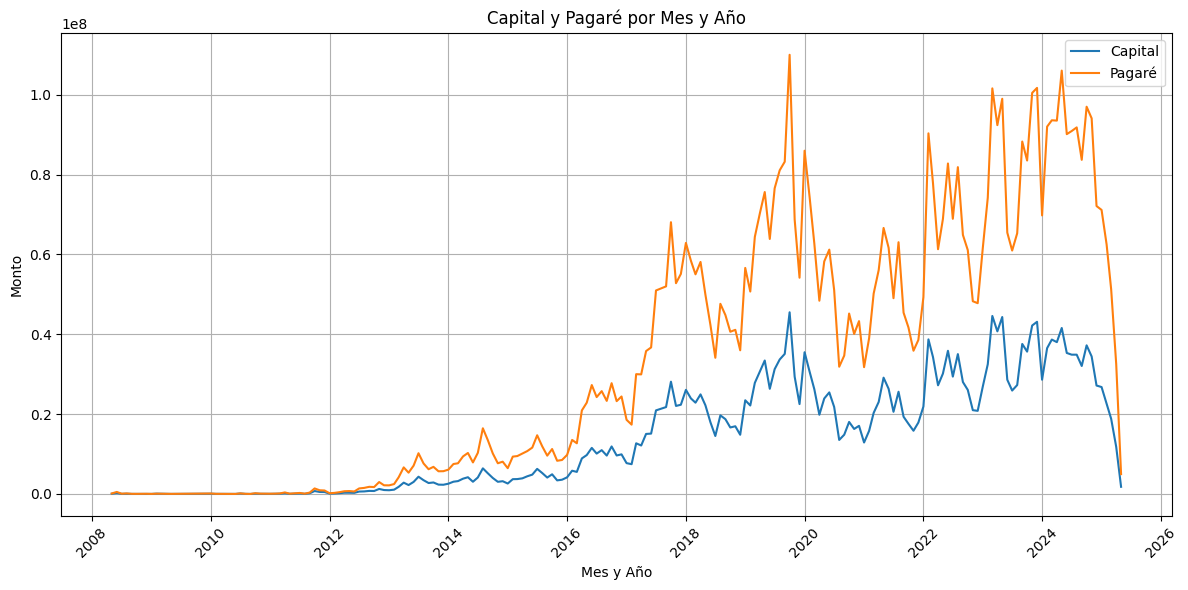

In [17]:
# Convertir la columna 'fechaAperturaCredito' a tipo datetime
pagare['fechaAperturaCredito'] = pd.to_datetime(pagare['fechaAperturaCredito'], format='%d/%m/%Y', errors='coerce')
# Extraer el año y el mes de la fecha
pagare['year'] = pagare['fechaAperturaCredito'].dt.year
pagare['month'] = pagare['fechaAperturaCredito'].dt.month
# Agrupamos por mes y año
pagare_grouped = pagare.groupby(['year', 'month'])[['capital', 'pagare']].sum().reset_index()
pagare_grouped['month_year'] = pd.to_datetime(pagare_grouped[['year', 'month']].assign(day=1))
pagare_grouped['capital'] = pagare_grouped['capital'].astype(float)
pagare_grouped['pagare'] = pagare_grouped['pagare'].astype(float)


# Grafica de pagare y capital conforme pasa el tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=pagare_grouped, x='month_year', y='capital', label='Capital')
sns.lineplot(data=pagare_grouped, x='month_year', y='pagare', label='Pagaré')
plt.title('Capital y Pagaré por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Monto')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
